In [ ]:
## 06_COVID_19 EN COLOMBIA

In [1]:
##cargar los modulos mas comunes, co su alias

import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## cargar el CSV desde datos.gov.co
covid = pd.read_csv("https://www.datos.gov.co/resource/gt2j-8ykr.csv?$limit=1000")


In [25]:
!wget -O covid.csv https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD

--2021-06-23 01:09:55--  https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD
Resolving www.datos.gov.co (www.datos.gov.co)... 52.206.140.205
Connecting to www.datos.gov.co (www.datos.gov.co)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘covid.csv’

covid.csv               [            <=>     ] 652.32M  1.17MB/s    in 14m 30s 

2021-06-23 01:24:27 (768 KB/s) - ‘covid.csv’ saved [684003027]



In [26]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_reporte_web      1000 non-null   datetime64[ns]
 1   id_de_caso             1000 non-null   int64         
 2   fecha_de_notificaci_n  1000 non-null   datetime64[ns]
 3   departamento           1000 non-null   int64         
 4   departamento_nom       1000 non-null   object        
 5   ciudad_municipio       1000 non-null   int64         
 6   ciudad_municipio_nom   1000 non-null   object        
 7   edad                   1000 non-null   int64         
 8   unidad_medida          1000 non-null   int64         
 9   sexo                   1000 non-null   object        
 10  fuente_tipo_contagio   1000 non-null   object        
 11  ubicacion              996 non-null    object        
 12  estado                 996 non-null    object        
 13  pais

In [27]:
#formato de columna 
covid.columns

Index(['fecha_reporte_web', 'id_de_caso', 'fecha_de_notificaci_n',
       'departamento', 'departamento_nom', 'ciudad_municipio',
       'ciudad_municipio_nom', 'edad', 'unidad_medida', 'sexo',
       'fuente_tipo_contagio', 'ubicacion', 'estado', 'pais_viajo_1_cod',
       'pais_viajo_1_nom', 'recuperado', 'fecha_inicio_sintomas',
       'fecha_muerte', 'fecha_diagnostico', 'fecha_recuperado',
       'tipo_recuperacion', 'per_etn_', 'nom_grupo_'],
      dtype='object')

In [28]:
# tamaño de la BDA
covid.shape

(1000, 23)

In [29]:
# imprimir primeros datos
covid.head()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,pais_viajo_1_cod,pais_viajo_1_nom,recuperado,fecha_inicio_sintomas,fecha_muerte,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,nom_grupo_
0,2020-03-06,1,2020-03-02,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,2020-02-27,NaT,2020-03-06,2020-03-13,PCR,6,NaN
1,2020-03-09,2,2020-03-06,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,2020-03-04,NaT,2020-03-09,2020-03-19,PCR,5,NaN
2,2020-03-09,3,2020-03-07,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,2020-02-29,NaT,2020-03-09,2020-03-15,PCR,6,NaN
3,2020-03-11,4,2020-03-09,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,2020-03-06,NaT,2020-03-11,2020-03-26,PCR,6,NaN
4,2020-03-11,5,2020-03-09,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,2020-03-08,NaT,2020-03-11,2020-03-23,PCR,6,NaN


In [30]:
# ordenar por dos columnas
covid.sort_values(by=["ciudad_municipio_nom", "edad"], ascending=True)

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,pais_viajo_1_cod,pais_viajo_1_nom,recuperado,fecha_inicio_sintomas,fecha_muerte,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,nom_grupo_
355,2020-03-24,356,2020-03-21,25,CUNDINAMARCA,25035,ANAPOIMA,32,1,M,...,724.0,ESPAÑA,Recuperado,2020-03-11,NaT,2020-03-24,2020-04-11,PCR,6,NaN
129,2020-03-20,130,2020-03-18,25,CUNDINAMARCA,25035,ANAPOIMA,53,1,M,...,840.0,ESTADOS UNIDOS DE AMÉRICA,Recuperado,2020-03-16,NaT,2020-03-20,2020-03-30,PCR,6,NaN
300,2020-03-23,301,2020-03-19,5,ANTIOQUIA,5045,APARTADO,29,1,F,...,792.0,TURQUÍA,Recuperado,2020-03-14,NaT,2020-03-23,2020-04-03,PCR,6,NaN
701,2020-03-29,702,2020-03-21,13,BOLIVAR,13052,ARJONA,22,1,F,...,792.0,TURQUÍA,Recuperado,2020-03-19,NaT,2020-03-29,2020-05-05,PCR,6,NaN
700,2020-03-29,701,2020-03-23,13,BOLIVAR,13052,ARJONA,25,1,M,...,NaN,NaN,Recuperado,2020-03-21,NaT,2020-03-29,2020-05-05,PCR,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,2020-03-31,807,2020-03-17,76,VALLE,76892,YUMBO,32,1,M,...,724.0,ESPAÑA,Recuperado,NaT,NaT,2020-03-31,2020-05-24,PCR,6,NaN
225,2020-03-22,226,2020-03-19,76,VALLE,76892,YUMBO,41,1,F,...,NaN,NaN,Recuperado,2020-03-16,NaT,2020-03-22,2020-05-08,PCR,6,NaN
921,2020-04-01,922,2020-03-25,76,VALLE,76892,YUMBO,68,1,F,...,724.0,ESPAÑA,Recuperado,2020-03-25,NaT,2020-04-01,2020-04-05,PCR,6,NaN
187,2020-03-21,188,2020-03-17,76,VALLE,76892,YUMBO,70,1,F,...,NaN,NaN,Fallecido,2020-03-08,2020-03-22,2020-03-21,NaT,NaN,6,NaN


In [31]:
# cuantas personas con sus edades hay infectadas por municipio
c2 = covid[["ciudad_municipio_nom", "sexo", "edad"]]
c2.groupby(["ciudad_municipio_nom"]) ["sexo"].describe()

,count,unique,top,freq
ciudad_municipio_nom,,,,
ANAPOIMA,2,1,M,2
APARTADO,1,1,F,1
ARJONA,2,2,M,1
ARMENIA,15,2,F,8
BARRANQUILLA,31,2,M,19
...,...,...,...,...
VILLETA,2,2,M,1
VITERBO,2,1,F,2
YOPAL,2,2,M,1


In [32]:
# cuantos y su edad
c2.groupby(["ciudad_municipio_nom"]) ["edad"].describe()

,count,mean,std,min,25%,50%,75%,max
ciudad_municipio_nom,,,,,,,,
ANAPOIMA,2.0,42.500000,14.849242,32.0,37.25,42.5,47.75,53.0
APARTADO,1.0,29.000000,NaN,29.0,29.00,29.0,29.00,29.0
ARJONA,2.0,23.500000,2.121320,22.0,22.75,23.5,24.25,25.0
ARMENIA,15.0,40.666667,16.736046,18.0,29.50,37.0,54.00,72.0
BARRANQUILLA,31.0,37.258065,17.013657,1.0,25.00,32.0,51.00,77.0
...,...,...,...,...,...,...,...,...
VILLETA,2.0,38.500000,7.778175,33.0,35.75,38.5,41.25,44.0
VITERBO,2.0,26.500000,16.263456,15.0,20.75,26.5,32.25,38.0
YOPAL,2.0,32.000000,8.485281,26.0,29.00,32.0,35.00,38.0


In [33]:
# covid por departamento
cd = covid.groupby(["departamento_nom"]) ["edad"].describe()
cd

,count,mean,std,min,25%,50%,75%,max
departamento_nom,,,,,,,,
ANTIOQUIA,106.0,40.386792,17.443007,5.0,28.00,36.5,52.00,87.0
ATLANTICO,4.0,33.500000,17.483325,16.0,19.75,34.0,47.75,50.0
BARRANQUILLA,31.0,37.258065,17.013657,1.0,25.00,32.0,51.00,77.0
BOGOTA,401.0,43.014963,16.041813,2.0,31.00,41.0,54.00,85.0
BOLIVAR,3.0,35.000000,19.974984,22.0,23.50,25.0,41.50,58.0
BOYACA,6.0,70.833333,8.658329,57.0,69.25,71.0,72.75,84.0
CALDAS,15.0,41.666667,20.450870,15.0,25.50,38.0,58.00,81.0
CARTAGENA,39.0,40.051282,15.435688,16.0,28.50,38.0,49.50,85.0
CASANARE,2.0,32.000000,8.485281,26.0,29.00,32.0,35.00,38.0


In [34]:
cd.shape

(27, 8)

In [35]:
cd.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [36]:
# eliminar el nivel
cd.columns = cd.columns.droplevel(0)

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [37]:
# contar caso por departamento
cd["count"]

departamento_nom
ANTIOQUIA          106.0
ATLANTICO            4.0
BARRANQUILLA        31.0
BOGOTA             401.0
BOLIVAR              3.0
BOYACA               6.0
CALDAS              15.0
CARTAGENA           39.0
CASANARE             2.0
CAUCA               12.0
CESAR               16.0
CORDOBA              2.0
CUNDINAMARCA        49.0
GUAJIRA              1.0
HUILA               30.0
MAGDALENA            1.0
META                12.0
NARIÑO               6.0
NORTE SANTANDER     19.0
QUINDIO             23.0
RISARALDA           34.0
SAN ANDRES           2.0
SANTANDER           12.0
STA MARTA D.E.      11.0
SUCRE                1.0
TOLIMA              14.0
VALLE              148.0
Name: count, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

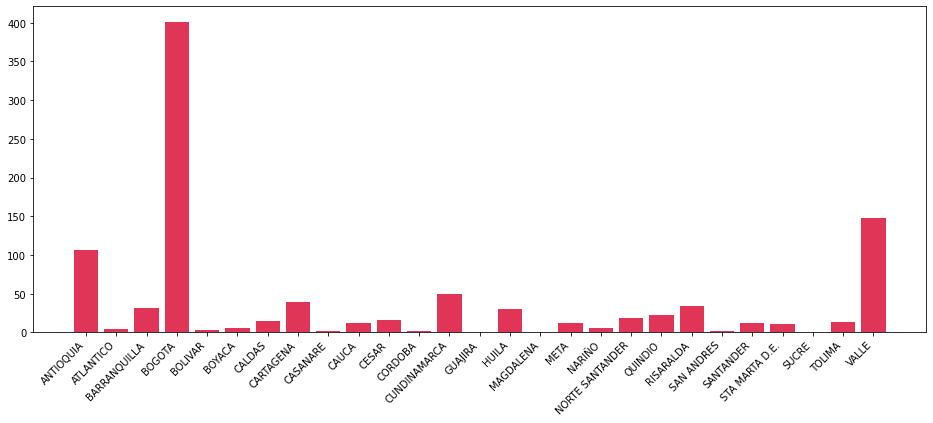

In [38]:
# graficar la cantidad de casos por departamento
fig, ax = plt.subplots(figsize=(16,6))
# alpha cambia la intensidad del color
# X es una de las columnas en este caso ya es index por la organizacion del group by  y la Y seria la cantidad representada en height
ax.bar(x=cd.index, height=cd["count"], color="crimson", alpha=0.86)
# https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text
plt.xticks(rotation=45, ha="right" )
plt.show

In [39]:
# 
covid.columns

Index(['fecha_reporte_web', 'id_de_caso', 'fecha_de_notificaci_n',
       'departamento', 'departamento_nom', 'ciudad_municipio',
       'ciudad_municipio_nom', 'edad', 'unidad_medida', 'sexo',
       'fuente_tipo_contagio', 'ubicacion', 'estado', 'pais_viajo_1_cod',
       'pais_viajo_1_nom', 'recuperado', 'fecha_inicio_sintomas',
       'fecha_muerte', 'fecha_diagnostico', 'fecha_recuperado',
       'tipo_recuperacion', 'per_etn_', 'nom_grupo_'],
      dtype='object')

In [40]:
for fecha in ['fecha_reporte_web', 'fecha_de_notificaci_n', 'fecha_inicio_sintomas', 'fecha_muerte', 'fecha_diagnostico', 'fecha_recuperado']:
    covid[fecha]= pd.to_datetime(covid[fecha], format="%d/%m/%Y %H:%M:%S")

In [41]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_reporte_web      1000 non-null   datetime64[ns]
 1   id_de_caso             1000 non-null   int64         
 2   fecha_de_notificaci_n  1000 non-null   datetime64[ns]
 3   departamento           1000 non-null   int64         
 4   departamento_nom       1000 non-null   object        
 5   ciudad_municipio       1000 non-null   int64         
 6   ciudad_municipio_nom   1000 non-null   object        
 7   edad                   1000 non-null   int64         
 8   unidad_medida          1000 non-null   int64         
 9   sexo                   1000 non-null   object        
 10  fuente_tipo_contagio   1000 non-null   object        
 11  ubicacion              996 non-null    object        
 12  estado                 996 non-null    object        
 13  pais

In [42]:
cf = covid.groupby(["fecha_diagnostico"])[["edad"]].describe()
cf.columns = cf.columns.droplevel(0)
cf


,count,mean,std,min,25%,50%,75%,max
fecha_diagnostico,,,,,,,,
2020-03-06,1.0,19.000000,NaN,19.0,19.00,19.0,19.00,19.0
2020-03-09,2.0,42.000000,11.313708,34.0,38.00,42.0,46.00,50.0
2020-03-11,6.0,40.333333,24.945273,22.0,25.50,27.5,48.25,85.0
2020-03-12,4.0,55.000000,18.797163,36.0,40.50,55.0,69.50,74.0
2020-03-13,5.0,50.600000,13.685759,30.0,48.00,49.0,61.00,65.0
2020-03-14,15.0,40.666667,18.668792,18.0,24.50,36.0,54.00,73.0
2020-03-15,20.0,44.250000,16.904920,23.0,29.75,41.5,56.00,79.0
2020-03-16,14.0,34.785714,14.550594,20.0,24.50,31.0,36.25,64.0
2020-03-17,25.0,40.040000,15.415036,9.0,29.00,42.0,53.00,72.0


<function matplotlib.pyplot.show(close=None, block=None)>

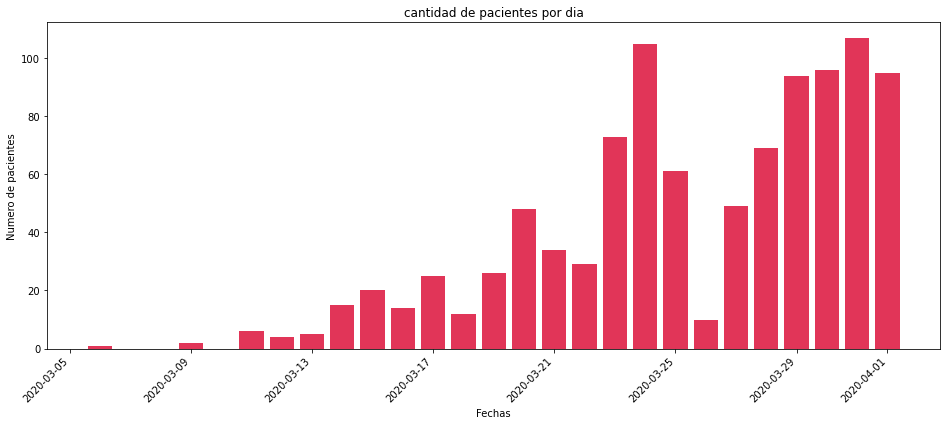

In [43]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set(title="cantidad de pacientes por dia", xlabel="Fechas", ylabel="Numero de pacientes")
ax.bar(x=cf.index, height=cf["count"], color="crimson", alpha=0.86)
# https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text
plt.xticks(rotation=45, ha="right" )
plt.show

In [44]:
covid.columns

Index(['fecha_reporte_web', 'id_de_caso', 'fecha_de_notificaci_n',
       'departamento', 'departamento_nom', 'ciudad_municipio',
       'ciudad_municipio_nom', 'edad', 'unidad_medida', 'sexo',
       'fuente_tipo_contagio', 'ubicacion', 'estado', 'pais_viajo_1_cod',
       'pais_viajo_1_nom', 'recuperado', 'fecha_inicio_sintomas',
       'fecha_muerte', 'fecha_diagnostico', 'fecha_recuperado',
       'tipo_recuperacion', 'per_etn_', 'nom_grupo_'],
      dtype='object')

In [48]:
# informaci
cf['acumulados'] = cf['count'].cumsum()

<function matplotlib.pyplot.show(close=None, block=None)>

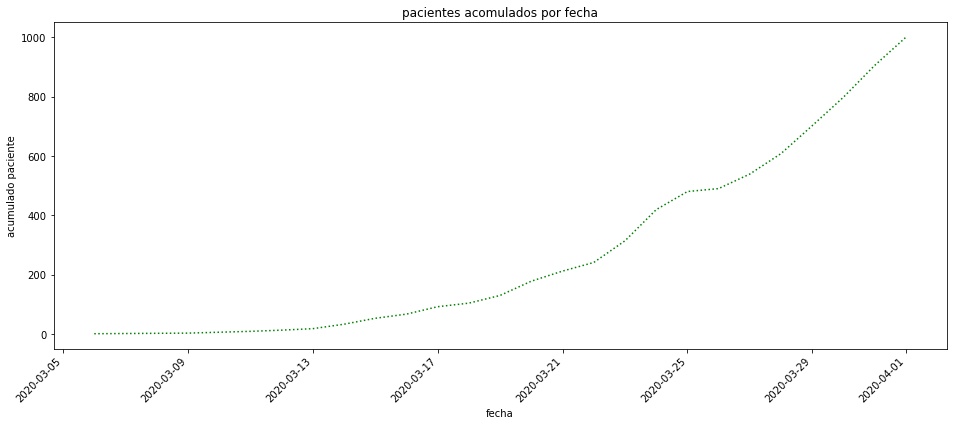

In [49]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(cf.index, cf ['acumulados'], 'g:')
ax.set(title='pacientes acomulados por fecha', xlabel='fecha', ylabel='acumulado paciente')
# https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text
plt.xticks(rotation=45, ha="right" )
plt.show

In [ ]:
# informacion  